# Fuel Efficiency of Battery-Electric Vehicles

**Names:** Jackie Jiang, Jonah Baayen, Rija Baig, Saawi Baloch

> **Data Set:** Battery-Electric Vehicles Fuel Consumption Ratings (2012-2021)
>
> **URL:**    https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

# Introduction

We chose this topic because we were ineterested in using data analysis for real life a situation. This topic stood out the most as in the real world data analysis is beneficial for businesses. As we can use data analysis to answer important questions to help understand trends and make better decisions. Upon exploring several daatasets we chose this because we wanted to find one that would be beneficial to examine and the results of which could be utilised in the actual world. We decided this would be the ideal dataset to investigate because we really have an interest in vehicles (electric cars in particular) and the environment. Another reason we picked this dataset is that it has a great number of attributes, which we feel will help us to dig further into this topic and answer more specific and relevant
questions(in particular, assist with questions that may be used in real-life situations).

List if questions we are interested in studying:
1.   How many different models are made per year? 
2.   Which Maker made the most models throughout the past 5 years?
3.   What are the top 3 best vehicles made by each manufacturer? How do they compare to their first vehicles?
4.   What are the top 5 efficient and inefficient models made per year?
5.   What are the top 3 vehicles that perform the best in the city, the highway, the comb in the past 5 years?
6.  What are the top 5 best vehicles per vehicle classification in terms of range?

Jackie: Data analysis questions we want to use this data for. Brainstorm methods we expect to apply when processing the data to answer these questions.Exploratory Data Analysis (Provide a detailed, well-organized description of your findings, including textual description, graphs, and code. Your focus should be on both the results and the process. Include, as reasonable and relevant, approaches that didn’t work, challenges, the data cleaning process, etc.)

Jonah: The code and analysis of basic characteristics of dataset. Analysis of the data Provide a detailed, well-organized description of data quality, 
including the features, any data that should be cleaned or pre-processed before you EDA.) README file for the final report.

Rija: Data analysis: do you see any potential for data science applications using this data? Models for prediction, recommendation, and data visualization. Potential Data Science (Based on your data analysis and findings. Describe any potential ideas if you were to pursue a data science or machine learning project using this dataset. If you don’t find any potential, explain your rationale.) Conclusion (Discuss limitations and future directions, lessons learned, maybe things you 
did not predict to find out or things you learned as you performed the analysis.)

Saawi: A brief description of the chosen dataset. Answered questions like: what is it about?, ad how it was collected. Description of each of the data attributes. Proposal and motivation. Why did we choose this dataset over others. Final Report introduction(Explain why you chose the topic, the questions you are interested in 
studying. List team members and a description of how each contributed to the project.)



## What is the data set about? How was it collected?

For new light-duty automobiles for retail sale in Canada, this dataset provides model-specific fuel consumption ratings and anticipated CO2 emissions.

To collect this data, the 5-cycle testing process is used by manufacturers. This approach includes testing for city and highway driving, as well as driving in cold weather, using air conditioners, and driving at greater speeds with faster acceleration and braking. Environment and Climate Change Canada collects the data from vehicle manufacturers.


## Data Attributes

> **Model (Year):** the year the car was made in

> **Make:** name of the manufacturer of the car

> **Model:** name of the model (helps distinguish cars made by the same manufacturer in the same year)

> **Vehicle Class:** category of the size of the cars (usually depending on passenger type ex: two-seater)

> **Motor(kW):** the maximum output energy of the car’s motor 

> **Transmission:** refers to the gearbox, all cars in the dataset are A1: automatic with 1 gear

> **Fuel type:** all cars in dataset are type B: fuel type is electricity

> **Consumption(City (kWh/100 km)):** fuel consumption in the city. The city test simulates urban driving

> **Consumption(Hwy(kWh/100 km)):** fuel consumption on the highway. The highway test simulates a mixture of open highway and rural road driving

> **Consumption(Comb(kWh/100 km)):** The combined fuel consumption rating reflects 55% city and 45% highway driving. 

> **Consumption(City(Le/100 km)):** Le is gasoline litre equivalent. One litre of gasoline contains the energy equivalent to 8.9 kWh of electricity.

> **Consumption(Hwy(Le/100 km)):** Le is gasoline litre equivalent. One litre of gasoline contains the energy equivalent to 8.9 kWh of electricity.

> **Consumption(Comb(Le/100 km)):** Le is gasoline litre equivalent. One litre of gasoline contains the energy equivalent to 8.9 kWh of electricity.

> **Range (km):** the estimated driving distance (in kilometres) on a fully charged battery

> **CO2 Emission(g/km):** the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving.

> **CO2 Rating:** the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best).

> **Smog Rating:** the tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)

> **Recharge Time(h):** the estimated time (in hours) to fully recharge the battery at 240 volts

## Code and analysis of dataset

In [1]:
#importing used libraries
import csv
import re
import pandas as pd
from functools import reduce
import numpy as np
import calendar
import string
import matplotlib.pyplot as plt

# if you want to use seaborn
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns

# read the CSV file and returns the data in a Python dictionary
def get_data_csv():
    collection = []
    with open('MY2012-2021 Battery Electric Vehicles Readable.csv', 'r') as f: #, encoding='cp1252'
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
# the data    
data = get_data_csv()
df = pd.DataFrame(data)
df = df.astype({"Year":'int',"City Consumption kWh": 'float64',"Hwy Consumption kWh": 'float64',"Comb Consumption kWh": 'float64',"City Consumption Le": 'float64',"Hwy Consumption Le": 'float64',"Comb Consumption Le": 'float64',"Range": 'float64'})

Hwy = list(map(lambda x:x['Hwy Consumption kWh'],data))
Comb = list(map(lambda x:x['Comb Consumption kWh'],data))
City = list(map(lambda x:x['City Consumption kWh'],data))
HwyLe = list(map(lambda x:x['Hwy Consumption Le'],data))
CombLe = list(map(lambda x:x['Comb Consumption Le'],data))
CityLe = list(map(lambda x:x['City Consumption Le'],data))


TotalKwh = list(map(lambda x,y,z: float(x)+float(y)+float(z),Hwy,Comb,City))
TotalsLe = list(map(lambda x,y,z: float(x)+float(y)+float(z),HwyLe,CombLe,CityLe))
df['Total Kwh'] = TotalKwh
df['Total L'] = TotalsLe


In [2]:
print("1. There are", len(data),"records.")
print()

print("2. There are", len({x['Year'] for x in data}), "years in the data, which are", sorted({x['Year'] for x in data}))
print()

print("3. There are", len({x['Make'] for x in data}), "makes in the data, which are", {x['Make'] for x in data})
print()

print("4. Unique models per make:")
makes = {x['Make'] for x in data}
for make in makes:
    unique_models = set([x['Model'] for x in data if x['Make'] == make])
    # Uncomment the following to also display the unique model names
    #print("\t", make, "has", len(unique_models), "unique model(s) in the data, which are", unique_models)
    print("\t", make, "has", len(unique_models), "unique model(s) in the data.")
print()
    
print("5. There are", len({x['Vehicle Class'] for x in data}), "vehicle classes in the data, which are", {x['Vehicle Class'] for x in data})
print()

print("6. The lowest range is", sorted({int(x['Range']) for x in data})[0],"km, and the highest is", sorted({int(x['Range']) for x in data})[-1], "km")
print("   The mean range is %.2fkm" % (sum({float(x['Range']) for x in data}) / len({float(x['Range']) for x in data})))
print()

print("7. The lowest recharge time is", sorted({float(x['Recharge Time']) for x in data})[0],"h, and the highest is", sorted({float(x['Recharge Time']) for x in data})[-1], "h")
print("   The mean recharge time is %.2fh" % (sum({float(x['Recharge Time']) for x in data}) / len({float(x['Recharge Time']) for x in data})))
print()

consumptions = sorted([x['Comb Consumption kWh'] for x in data])
print("8. The model(s) with the lowest consumption are", [str(x['Year']) + " " +str(x['Make']) + " " + str(x['Model']) for x in data if x['Comb Consumption kWh'] == consumptions[0]])
print("   The model(s) with the highest consumption are", [str(x['Year']) + " " +str(x['Make']) + " " + str(x['Model']) for x in data if x['Comb Consumption kWh'] == consumptions[-1]])
print()

print("The first 3 records in the data are:\n", data[:3])

1. There are 229 records.

2. There are 10 years in the data, which are ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

3. There are 18 makes in the data, which are {'smart EQ', 'Ford', 'Mitsubishi', 'Nissan', 'Volvo', 'Porsche', 'MINI', 'Audi', 'Kia', 'Hyundai', 'Chevrolet', 'smart', 'Volkswagen', 'Jaguar', 'BMW', 'Tesla ', 'Polestar', 'Tesla'}

4. Unique models per make:
	 smart EQ has 2 unique model(s) in the data.
	 Ford has 7 unique model(s) in the data.
	 Mitsubishi has 1 unique model(s) in the data.
	 Nissan has 6 unique model(s) in the data.
	 Volvo has 1 unique model(s) in the data.
	 Porsche has 8 unique model(s) in the data.
	 MINI has 1 unique model(s) in the data.
	 Audi has 2 unique model(s) in the data.
	 Kia has 4 unique model(s) in the data.
	 Hyundai has 2 unique model(s) in the data.
	 Chevrolet has 2 unique model(s) in the data.
	 smart has 2 unique model(s) in the data.
	 Volkswagen has 3 unique model(s) in the data.
	 Jaguar has 1

We chose this dataset because we wanted to find one that would be beneficial to examine and the results of which could be utilised in the actual world. We decided this would be the ideal dataset to investigate because we really have an interest in vehicles (electric cars in particular) and the environment. Another reason we picked this dataset is that it has a great number of attributes, which we feel will help us to dig further into this topic and answer more specific and relevant questions(in particular, assist with questions that may be used in real-life situations).

#### Questions:

> How many different models are made per year?

> Which Maker made the most models throughout the past 5 years?

> What are the top 3 best vehicles made by each manufacturer? How do they compare to their first vehicles?

> What are the top 5 efficient and inefficient models made per year?

> What are the top 3 vehicles that perform the best in the city, the highway, the comb in the past 5 years?

> What are the top 5 best vehicles per vehicle classification in terms of range?


,Year,Models Made
0,2012,2
1,2013,9
2,2014,9
3,2015,14
4,2016,27
5,2017,23
6,2018,21
7,2019,35
8,2020,40
9,2021,49


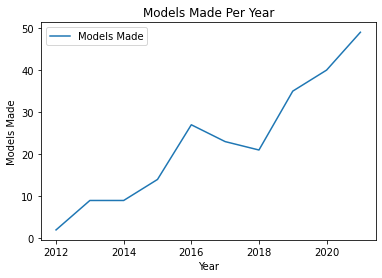

In [3]:
#How many different models are made per year? Is there a reason for this trend?
Year = list(map(lambda x:x['Year'],data))
Models = list(map(lambda x : x['Model'], data))
Years = sorted(set(Year))
items = list(map(lambda x,y: [x,y],Year,Models))
Total = list(map(lambda x: Year.count(x),Years))
Totals = list(map(lambda x,y: [x,y],Years,Total))
modelsPerYear = pd.DataFrame(Totals).rename(columns={0: "Year", 1: "Models Made"})
modelsPerYear
modelsPerYear.plot(x="Year").set(title="Models Made Per Year",xlabel="Year",ylabel="Models Made")
modelsPerYear

In [4]:
#Which Maker made the most models throughout the past 5 years?
Years = df.Year.unique()
Makers = df.Make.unique()
Years = Years[5:]
YearData = pd.DataFrame(df,columns=['Year','Make'])
YearData = YearData.loc[YearData['Year'] >= 2017]
YearData = YearData.pivot_table(index='Year',columns='Make',aggfunc=len,fill_value=0)
YearData


Make,Audi,BMW,Chevrolet,Ford,Hyundai,Jaguar,Kia,MINI,Mitsubishi,Nissan,Polestar,Porsche,Tesla,Tesla,Volkswagen,Volvo,smart,smart EQ
Year,,,,,,,,,,,,,,,,,,
2017,0,2,1,1,1,0,1,0,1,1,0,0,7,7,1,0,0,0
2018,0,2,1,1,1,0,1,0,0,1,0,0,11,0,1,0,2,0
2019,1,2,1,0,2,1,2,0,0,3,0,0,20,0,1,0,0,2
2020,1,2,1,0,2,1,3,1,0,3,0,3,22,0,1,0,0,0
2021,2,2,1,6,2,0,3,1,0,3,1,8,17,0,2,1,0,0


In [5]:
#What are the top 3 best vehicles in terms of range made by each manufacturer? How do they compare to their first vehicles?
Maker = df.Make.unique()
Models = df['Model']
TotalKwh = df['Total Kwh']
TotalL = df['Total L']

MakeData = pd.DataFrame(df,columns=['Make','Year','Model','Total Kwh','Range','Total L'])
MakeData.iloc[:,0]
MakersModels = list(map(lambda Make:MakeData[MakeData.apply(lambda x : x['Make'] == Make,axis=1)],Maker))
MakersModel = list(map(lambda x:x.sort_values(by=['Range'],ascending=True),MakersModels))
print("Top 3 models made per maker based on Range")
list(map(lambda x:display(x.head(3)),MakersModel))
print()
print()
MakersModel = list(map(lambda x:x.sort_values(by=['Year'],ascending=True),MakersModels))
print("First model made per maker")
list(map(lambda x:display(x.head(1)),MakersModel))
print()

Top 3 models made per maker based on Range


,Make,Year,Model,Total Kwh,Range,Total L
0,Mitsubishi,2012,i-MiEV,57.0,100.0,6.4
3,Mitsubishi,2013,i-MiEV,57.0,100.0,6.4
13,Mitsubishi,2014,i-MiEV,57.0,100.0,6.4


,Make,Year,Model,Total Kwh,Range,Total L
1,Nissan,2012,LEAF,63.4,117.0,7.2
4,Nissan,2013,LEAF,63.4,117.0,7.2
14,Nissan,2014,LEAF,55.7,135.0,6.3


,Make,Year,Model,Total Kwh,Range,Total L
2,Ford,2013,Focus Electric,60.1,122.0,6.7
12,Ford,2014,Focus Electric,60.1,122.0,6.7
22,Ford,2015,Focus Electric,60.1,122.0,6.7


,Make,Year,Model,Total Kwh,Range,Total L
91,smart,2018,fortwo electric drive cabriolet,62.5,92.0,7.0
92,smart,2018,fortwo electric drive coupe,58.5,93.0,6.6
5,smart,2013,fortwo electric drive cabriolet,59.3,109.0,6.6


,Make,Year,Model,Total Kwh,Range,Total L
157,Tesla,2020,Model 3 Standard Range,46.9,151.0,5.3
119,Tesla,2019,Model 3 Standard Range,46.9,151.0,5.3
209,Tesla,2021,Model 3 Standard Range,45.7,151.0,5.1


,Make,Year,Model,Total Kwh,Range,Total L
11,Chevrolet,2014,Spark EV,53.4,131.0,6.0
21,Chevrolet,2015,Spark EV,53.4,131.0,6.0
35,Chevrolet,2016,Spark EV,53.4,131.0,6.0


,Make,Year,Model,Total Kwh,Range,Total L
20,BMW,2015,i3,50.8,130.0,5.7
34,BMW,2016,i3,50.8,130.0,5.7
61,BMW,2017,i3 (60 Ah),50.8,130.0,5.7


,Make,Year,Model,Total Kwh,Range,Total L
23,Kia,2015,Soul EV,60.1,149.0,6.8
37,Kia,2016,Soul EV,60.1,149.0,6.8
66,Kia,2017,Soul EV,60.3,150.0,6.8


,Make,Year,Model,Total Kwh,Range,Total L
56,Tesla,2016,Model X 60D,67.8,322.0,7.6
77,Tesla,2017,Model X 60D,67.8,322.0,7.6
78,Tesla,2017,Model X 75D,67.4,383.0,7.6


,Make,Year,Model,Total Kwh,Range,Total L
65,Hyundai,2017,IONIQ Electric,46.6,200.0,5.2
88,Hyundai,2018,IONIQ Electric,46.6,200.0,5.2
109,Hyundai,2019,IONIQ Electric,46.6,200.0,5.2


,Make,Year,Model,Total Kwh,Range,Total L
179,Volkswagen,2020,e-Golf,55.9,198.0,6.3
83,Volkswagen,2017,e-Golf,52.8,201.0,6.0
104,Volkswagen,2018,e-Golf,52.8,201.0,6.0


,Make,Year,Model,Total Kwh,Range,Total L
105,Audi,2019,e-tron 55 quattro,84.8,329.0,9.6
140,Audi,2020,e-tron Sportback 55 quattro,81.8,351.0,9.2
181,Audi,2021,e-tron Sportback 55 quattro,81.9,351.0,9.2


,Make,Year,Model,Total Kwh,Range,Total L
111,Jaguar,2019,I-PACE,82.8,377.0,9.3
146,Jaguar,2020,I-PACE,82.8,377.0,9.3


,Make,Year,Model,Total Kwh,Range,Total L
117,smart EQ,2019,fortwo cabriolet,62.5,92.0,7.0
118,smart EQ,2019,fortwo coupe,58.5,93.0,6.6


,Make,Year,Model,Total Kwh,Range,Total L
150,MINI,2020,Cooper SE 3 Door,58.5,177.0,6.5
196,MINI,2021,Cooper SE 3 Door,58.5,177.0,6.5


,Make,Year,Model,Total Kwh,Range,Total L
156,Porsche,2020,Taycan Turbo S,93.0,309.0,10.4
201,Porsche,2021,Taycan 4S (Performance Battery),79.1,320.0,8.9
155,Porsche,2020,Taycan Turbo,90.6,323.0,10.2


,Make,Year,Model,Total Kwh,Range,Total L
200,Polestar,2021,2,68.6,375.0,7.8


,Make,Year,Model,Total Kwh,Range,Total L
228,Volvo,2021,XC40 Recharge,80.3,335.0,9.1




First model made per maker


,Make,Year,Model,Total Kwh,Range,Total L
0,Mitsubishi,2012,i-MiEV,57.0,100.0,6.4


,Make,Year,Model,Total Kwh,Range,Total L
1,Nissan,2012,LEAF,63.4,117.0,7.2


,Make,Year,Model,Total Kwh,Range,Total L
2,Ford,2013,Focus Electric,60.1,122.0,6.7


,Make,Year,Model,Total Kwh,Range,Total L
5,smart,2013,fortwo electric drive cabriolet,59.3,109.0,6.6


,Make,Year,Model,Total Kwh,Range,Total L
7,Tesla,2013,Model S (40 kWh),66.5,224.0,7.5


,Make,Year,Model,Total Kwh,Range,Total L
11,Chevrolet,2014,Spark EV,53.4,131.0,6.0


,Make,Year,Model,Total Kwh,Range,Total L
20,BMW,2015,i3,50.8,130.0,5.7


,Make,Year,Model,Total Kwh,Range,Total L
23,Kia,2015,Soul EV,60.1,149.0,6.8


,Make,Year,Model,Total Kwh,Range,Total L
56,Tesla,2016,Model X 60D,67.8,322.0,7.6


,Make,Year,Model,Total Kwh,Range,Total L
65,Hyundai,2017,IONIQ Electric,46.6,200.0,5.2


,Make,Year,Model,Total Kwh,Range,Total L
83,Volkswagen,2017,e-Golf,52.8,201.0,6.0


,Make,Year,Model,Total Kwh,Range,Total L
105,Audi,2019,e-tron 55 quattro,84.8,329.0,9.6


,Make,Year,Model,Total Kwh,Range,Total L
111,Jaguar,2019,I-PACE,82.8,377.0,9.3


,Make,Year,Model,Total Kwh,Range,Total L
117,smart EQ,2019,fortwo cabriolet,62.5,92.0,7.0


,Make,Year,Model,Total Kwh,Range,Total L
150,MINI,2020,Cooper SE 3 Door,58.5,177.0,6.5


,Make,Year,Model,Total Kwh,Range,Total L
154,Porsche,2020,Taycan 4S (Performance Battery Plus),90.8,327.0,10.2


,Make,Year,Model,Total Kwh,Range,Total L
200,Polestar,2021,2,68.6,375.0,7.8


,Make,Year,Model,Total Kwh,Range,Total L
228,Volvo,2021,XC40 Recharge,80.3,335.0,9.1


In [6]:
#What are the top 5 efficient and inefficient models made per year base on fuel kwh consumption?
Years = df.Year.unique()
YearData = pd.DataFrame(df,columns=['Make','Year','Model','Total Kwh','Total L','Range'])
YearData
YearModels = list(map(lambda y:YearData[YearData.apply(lambda x : x['Year'] == y,axis=1)],Years))
inEfficient = list(map(lambda x:x.sort_values(by=['Total Kwh'],ascending=False),YearModels))
efficient = list(map(lambda x:x.sort_values(by=['Total Kwh'],ascending=True),YearModels))
def showEfficient(x):
  display(x.head(5))
def showInEfficient(x):
  display(x.head(5))
print(f"Top 5 efficient vehicles per year base on fuel kwh consumption")
list(map(lambda x: showEfficient(x),efficient))
print(f"Top 5 inefficient vehicles per year base on fuel kwh consumption")
list(map(lambda x: showInEfficient(x),inEfficient))
print()


Top 5 efficient vehicles per year base on fuel kwh consumption


,Make,Year,Model,Total Kwh,Total L,Range
0,Mitsubishi,2012,i-MiEV,57.0,6.4,100.0
1,Nissan,2012,LEAF,63.4,7.2,117.0


,Make,Year,Model,Total Kwh,Total L,Range
3,Mitsubishi,2013,i-MiEV,57.0,6.4,100.0
5,smart,2013,fortwo electric drive cabriolet,59.3,6.6,109.0
6,smart,2013,fortwo electric drive coupe,59.3,6.6,109.0
2,Ford,2013,Focus Electric,60.1,6.7,122.0
4,Nissan,2013,LEAF,63.4,7.2,117.0


,Make,Year,Model,Total Kwh,Total L,Range
11,Chevrolet,2014,Spark EV,53.4,6.0,131.0
14,Nissan,2014,LEAF,55.7,6.3,135.0
13,Mitsubishi,2014,i-MiEV,57.0,6.4,100.0
15,smart,2014,fortwo electric drive cabriolet,59.3,6.6,109.0
16,smart,2014,fortwo electric drive coupe,59.3,6.6,109.0


,Make,Year,Model,Total Kwh,Total L,Range
20,BMW,2015,i3,50.8,5.7,130.0
21,Chevrolet,2015,Spark EV,53.4,6.0,131.0
25,Nissan,2015,LEAF,55.7,6.3,135.0
24,Mitsubishi,2015,i-MiEV,57.0,6.4,100.0
26,smart,2015,fortwo electric drive cabriolet,59.3,6.6,109.0


,Make,Year,Model,Total Kwh,Total L,Range
34,BMW,2016,i3,50.8,5.7,130.0
35,Chevrolet,2016,Spark EV,53.4,6.0,131.0
39,Nissan,2016,LEAF (24 kWh),55.7,6.3,135.0
40,Nissan,2016,LEAF (30 kWh),56.3,6.3,172.0
38,Mitsubishi,2016,i-MiEV,57.0,6.4,100.0


,Make,Year,Model,Total Kwh,Total L,Range
65,Hyundai,2017,IONIQ Electric,46.6,5.2,200.0
61,BMW,2017,i3 (60 Ah),50.8,5.7,130.0
83,Volkswagen,2017,e-Golf,52.8,6.0,201.0
63,Chevrolet,2017,Bolt EV,53.0,5.9,383.0
62,BMW,2017,i3 (94 Ah),53.7,6.0,183.0


,Make,Year,Model,Total Kwh,Total L,Range
88,Hyundai,2018,IONIQ Electric,46.6,5.2,200.0
94,Tesla,2018,Model 3 Long Range,48.4,5.4,499.0
93,Tesla,2018,Model 3 Mid Range,51.4,5.7,418.0
104,Volkswagen,2018,e-Golf,52.8,6.0,201.0
86,Chevrolet,2018,Bolt EV,53.0,5.9,383.0


,Make,Year,Model,Total Kwh,Total L,Range
109,Hyundai,2019,IONIQ Electric,46.6,5.2,200.0
119,Tesla,2019,Model 3 Standard Range,46.9,5.3,151.0
120,Tesla,2019,Model 3 Standard Range Plus,47.5,5.4,386.0
122,Tesla,2019,Model 3 Long Range,48.4,5.4,499.0
121,Tesla,2019,Model 3 Mid Range,51.4,5.7,425.0


,Make,Year,Model,Total Kwh,Total L,Range
158,Tesla,2020,Model 3 Standard Range Plus,44.9,5.1,402.0
157,Tesla,2020,Model 3 Standard Range,46.9,5.3,151.0
144,Hyundai,2020,IONIQ Electric,47.7,5.3,274.0
160,Tesla,2020,Model 3 Long Range,48.4,5.4,531.0
159,Tesla,2020,Model 3 Mid Range,51.4,5.7,425.0


,Make,Year,Model,Total Kwh,Total L,Range
210,Tesla,2021,Model 3 Standard Range Plus,44.4,5.1,423.0
209,Tesla,2021,Model 3 Standard Range,45.7,5.1,151.0
211,Tesla,2021,Model 3 Long Range AWD,47.0,5.4,568.0
191,Hyundai,2021,IONIQ Electric,47.7,5.3,274.0
223,Tesla,2021,Model Y Standard Range,48.8,5.5,393.0


Top 5 inefficient vehicles per year base on fuel kwh consumption


,Make,Year,Model,Total Kwh,Total L,Range
1,Nissan,2012,LEAF,63.4,7.2,117.0
0,Mitsubishi,2012,i-MiEV,57.0,6.4,100.0


,Make,Year,Model,Total Kwh,Total L,Range
10,Tesla,2013,Model S Performance,70.7,7.9,426.0
9,Tesla,2013,Model S (85 kWh),70.6,7.9,426.0
7,Tesla,2013,Model S (40 kWh),66.5,7.5,224.0
8,Tesla,2013,Model S (60 kWh),65.8,7.4,335.0
4,Nissan,2013,LEAF,63.4,7.2,117.0


,Make,Year,Model,Total Kwh,Total L,Range
19,Tesla,2014,Model S Performance,70.7,7.9,426.0
18,Tesla,2014,Model S (85 kWh),70.6,7.9,426.0
17,Tesla,2014,Model S (60 kWh),65.8,7.4,335.0
12,Ford,2014,Focus Electric,60.1,6.7,122.0
15,smart,2014,fortwo electric drive cabriolet,59.3,6.6,109.0


,Make,Year,Model,Total Kwh,Total L,Range
29,Tesla,2015,Model S (70 kWh),70.6,7.9,377.0
30,Tesla,2015,Model S (85/90 kWh),70.6,7.9,426.0
33,Tesla,2015,Model S P85D/P90D,67.4,7.5,407.0
28,Tesla,2015,Model S (60 kWh),65.8,7.4,335.0
32,Tesla,2015,Model S 85D/90D,62.8,7.1,435.0


,Make,Year,Model,Total Kwh,Total L,Range
60,Tesla,2016,Model X P100D,73.0,8.2,465.0
45,Tesla,2016,Model S (70 kWh),70.6,7.9,377.0
47,Tesla,2016,Model S (85/90 kWh),70.6,7.9,426.0
59,Tesla,2016,Model X P90D,70.4,7.9,402.0
58,Tesla,2016,Model X 90D,68.1,7.7,414.0


,Make,Year,Model,Total Kwh,Total L,Range
82,Tesla,2017,Model X P100D,73.0,8.2,465.0
80,Tesla,2017,Model X 100D,72.0,8.1,475.0
81,Tesla,2017,Model X P90D,70.4,7.9,402.0
79,Tesla,2017,Model X 90D,68.1,7.7,414.0
77,Tesla,2017,Model X 60D,67.8,7.6,322.0


,Make,Year,Model,Total Kwh,Total L,Range
103,Tesla,2018,Model X P100D,73.6,8.3,465.0
102,Tesla,2018,Model X 100D,72.0,8.1,475.0
101,Tesla,2018,Model X 75D,67.4,7.6,383.0
100,Tesla,2018,Model S P100D,64.1,7.2,507.0
97,Tesla,2018,Model S (75 kWh),63.8,7.2,401.0


,Make,Year,Model,Total Kwh,Total L,Range
105,Audi,2019,e-tron 55 quattro,84.8,9.6,329.0
111,Jaguar,2019,I-PACE,82.8,9.3,377.0
138,Tesla,2019,"Model X Performance (22"" Wheels)",79.9,8.9,435.0
134,Tesla,2019,Model X P100D,73.6,8.3,465.0
133,Tesla,2019,Model X 100D,72.0,8.1,475.0


,Make,Year,Model,Total Kwh,Total L,Range
156,Porsche,2020,Taycan Turbo S,93.0,10.4,309.0
154,Porsche,2020,Taycan 4S (Performance Battery Plus),90.8,10.2,327.0
155,Porsche,2020,Taycan Turbo,90.6,10.2,323.0
146,Jaguar,2020,I-PACE,82.8,9.3,377.0
140,Audi,2020,e-tron Sportback 55 quattro,81.8,9.2,351.0


,Make,Year,Model,Total Kwh,Total L,Range
204,Porsche,2021,Taycan Turbo S,89.6,10.1,323.0
207,Porsche,2021,Taycan Turbo Cross Turismo,87.4,9.9,328.0
208,Porsche,2021,Taycan Turbo S Cross Turismo,85.8,9.6,325.0
203,Porsche,2021,Taycan Turbo,85.8,9.6,341.0
206,Porsche,2021,Taycan 4S Cross Turismo,84.0,9.3,346.0


In [7]:
#What are the top 3 vehicles that perform the best in the city, the highway, the comb in the past 5 years?
Years = df.Year.unique()
Years = Years[5:]
YearData = pd.DataFrame(df,columns=['Year','Make','City Consumption kWh','Hwy Consumption kWh','Comb Consumption kWh','Model','Range','Vehicle Class'])
YearModels = list(map(lambda y:YearData[YearData.apply(lambda x : x['Year'] == y,axis=1)],Years))

print("City Consumption kWh")
CityConsumption = list(map(lambda x:x.sort_values(by=['City Consumption kWh'],ascending=True),YearModels))
CityConsumption = list(map(lambda x:x.head(3),CityConsumption))
list(map(lambda x: display(x),CityConsumption))
print("\nHwy Consumption kWh")
HwyConsumption = list(map(lambda x:x.sort_values(by=['Hwy Consumption kWh'],ascending=True),YearModels))
HwyConsumption = list(map(lambda x:x.head(3),HwyConsumption))
list(map(lambda x: display(x),HwyConsumption))
print("\nComb Consumption kWh")
CombConsumption = list(map(lambda x:x.sort_values(by=['Comb Consumption kWh'],ascending=True),YearModels))
CombConsumption = list(map(lambda x:x.head(3),CombConsumption))
list(map(lambda x: display(x),CombConsumption))
print()

City Consumption kWh


,Year,Make,City Consumption kWh,Hwy Consumption kWh,Comb Consumption kWh,Model,Range,Vehicle Class
65,2017,Hyundai,13.7,17.4,15.5,IONIQ Electric,200.0,Mid-size
61,2017,BMW,15.2,18.8,16.8,i3 (60 Ah),130.0,Subcompact
62,2017,BMW,16.2,19.7,17.8,i3 (94 Ah),183.0,Subcompact


,Year,Make,City Consumption kWh,Hwy Consumption kWh,Comb Consumption kWh,Model,Range,Vehicle Class
88,2018,Hyundai,13.7,17.4,15.5,IONIQ Electric,200.0,Mid-size
94,2018,Tesla,15.3,17.0,16.1,Model 3 Long Range,499.0,Mid-size
84,2018,BMW,16.2,19.7,17.8,i3,183.0,Subcompact


,Year,Make,City Consumption kWh,Hwy Consumption kWh,Comb Consumption kWh,Model,Range,Vehicle Class
109,2019,Hyundai,13.7,17.4,15.5,IONIQ Electric,200.0,Mid-size
119,2019,Tesla,14.8,16.5,15.6,Model 3 Standard Range,151.0,Mid-size
120,2019,Tesla,14.9,16.8,15.8,Model 3 Standard Range Plus,386.0,Mid-size


,Year,Make,City Consumption kWh,Hwy Consumption kWh,Comb Consumption kWh,Model,Range,Vehicle Class
158,2020,Tesla,14.1,15.9,14.9,Model 3 Standard Range Plus,402.0,Mid-size
144,2020,Hyundai,14.5,17.4,15.8,IONIQ Electric,274.0,Mid-size
157,2020,Tesla,14.8,16.5,15.6,Model 3 Standard Range,151.0,Mid-size


,Year,Make,City Consumption kWh,Hwy Consumption kWh,Comb Consumption kWh,Model,Range,Vehicle Class
210,2021,Tesla,13.9,15.7,14.8,Model 3 Standard Range Plus,423.0,Mid-size
209,2021,Tesla,14.5,16.0,15.2,Model 3 Standard Range,151.0,Mid-size
191,2021,Hyundai,14.5,17.4,15.8,IONIQ Electric,274.0,Mid-size



Hwy Consumption kWh


,Year,Make,City Consumption kWh,Hwy Consumption kWh,Comb Consumption kWh,Model,Range,Vehicle Class
65,2017,Hyundai,13.7,17.4,15.5,IONIQ Electric,200.0,Mid-size
83,2017,Volkswagen,16.8,18.6,17.4,e-Golf,201.0,Compact
61,2017,BMW,15.2,18.8,16.8,i3 (60 Ah),130.0,Subcompact


,Year,Make,City Consumption kWh,Hwy Consumption kWh,Comb Consumption kWh,Model,Range,Vehicle Class
94,2018,Tesla,15.3,17.0,16.1,Model 3 Long Range,499.0,Mid-size
88,2018,Hyundai,13.7,17.4,15.5,IONIQ Electric,200.0,Mid-size
93,2018,Tesla,16.4,17.9,17.1,Model 3 Mid Range,418.0,Mid-size


,Year,Make,City Consumption kWh,Hwy Consumption kWh,Comb Consumption kWh,Model,Range,Vehicle Class
119,2019,Tesla,14.8,16.5,15.6,Model 3 Standard Range,151.0,Mid-size
120,2019,Tesla,14.9,16.8,15.8,Model 3 Standard Range Plus,386.0,Mid-size
122,2019,Tesla,15.3,17.0,16.1,Model 3 Long Range,499.0,Mid-size


,Year,Make,City Consumption kWh,Hwy Consumption kWh,Comb Consumption kWh,Model,Range,Vehicle Class
158,2020,Tesla,14.1,15.9,14.9,Model 3 Standard Range Plus,402.0,Mid-size
157,2020,Tesla,14.8,16.5,15.6,Model 3 Standard Range,151.0,Mid-size
160,2020,Tesla,15.3,17.0,16.1,Model 3 Long Range,531.0,Mid-size


,Year,Make,City Consumption kWh,Hwy Consumption kWh,Comb Consumption kWh,Model,Range,Vehicle Class
210,2021,Tesla,13.9,15.7,14.8,Model 3 Standard Range Plus,423.0,Mid-size
209,2021,Tesla,14.5,16.0,15.2,Model 3 Standard Range,151.0,Mid-size
211,2021,Tesla,14.9,16.5,15.6,Model 3 Long Range AWD,568.0,Mid-size



Comb Consumption kWh


,Year,Make,City Consumption kWh,Hwy Consumption kWh,Comb Consumption kWh,Model,Range,Vehicle Class
65,2017,Hyundai,13.7,17.4,15.5,IONIQ Electric,200.0,Mid-size
61,2017,BMW,15.2,18.8,16.8,i3 (60 Ah),130.0,Subcompact
83,2017,Volkswagen,16.8,18.6,17.4,e-Golf,201.0,Compact


,Year,Make,City Consumption kWh,Hwy Consumption kWh,Comb Consumption kWh,Model,Range,Vehicle Class
88,2018,Hyundai,13.7,17.4,15.5,IONIQ Electric,200.0,Mid-size
94,2018,Tesla,15.3,17.0,16.1,Model 3 Long Range,499.0,Mid-size
93,2018,Tesla,16.4,17.9,17.1,Model 3 Mid Range,418.0,Mid-size


,Year,Make,City Consumption kWh,Hwy Consumption kWh,Comb Consumption kWh,Model,Range,Vehicle Class
109,2019,Hyundai,13.7,17.4,15.5,IONIQ Electric,200.0,Mid-size
119,2019,Tesla,14.8,16.5,15.6,Model 3 Standard Range,151.0,Mid-size
120,2019,Tesla,14.9,16.8,15.8,Model 3 Standard Range Plus,386.0,Mid-size


,Year,Make,City Consumption kWh,Hwy Consumption kWh,Comb Consumption kWh,Model,Range,Vehicle Class
158,2020,Tesla,14.1,15.9,14.9,Model 3 Standard Range Plus,402.0,Mid-size
157,2020,Tesla,14.8,16.5,15.6,Model 3 Standard Range,151.0,Mid-size
144,2020,Hyundai,14.5,17.4,15.8,IONIQ Electric,274.0,Mid-size


,Year,Make,City Consumption kWh,Hwy Consumption kWh,Comb Consumption kWh,Model,Range,Vehicle Class
210,2021,Tesla,13.9,15.7,14.8,Model 3 Standard Range Plus,423.0,Mid-size
209,2021,Tesla,14.5,16.0,15.2,Model 3 Standard Range,151.0,Mid-size
211,2021,Tesla,14.9,16.5,15.6,Model 3 Long Range AWD,568.0,Mid-size


In [8]:
#What are the top 5 best vehicles per vehicle classification in terms of range?
Classes = df['Vehicle Class'].unique()
ClassesData = pd.DataFrame(df,columns=['Year','Make','Vehicle Class','Model','Range'])
ClassesData = list(map(lambda y:ClassesData[ClassesData.apply(lambda x : x['Vehicle Class'] == y,axis=1)],Classes))
ClassData = list(map(lambda x:x.sort_values(by=['Range'],ascending=False),ClassesData))
ClassData = list(map(lambda x:x.head(5),ClassData))
list(map(lambda x: display(x),ClassData))
print()


,Year,Make,Vehicle Class,Model,Range
183,2021,BMW,Subcompact,i3s (120 Ah),246.0
182,2021,BMW,Subcompact,i3 (120 Ah),246.0
142,2020,BMW,Subcompact,i3s (120 Ah),246.0
141,2020,BMW,Subcompact,i3 (120 Ah),246.0
107,2019,BMW,Subcompact,i3s (120 Ah),246.0


,Year,Make,Vehicle Class,Model,Range
211,2021,Tesla,Mid-size,Model 3 Long Range AWD,568.0
160,2020,Tesla,Mid-size,Model 3 Long Range,531.0
161,2020,Tesla,Mid-size,Model 3 Long Range AWD,518.0
162,2020,Tesla,Mid-size,"Model 3 Long Range AWD Performance (18"" Wheels)",518.0
212,2021,Tesla,Mid-size,Model 3 Performance,507.0


,Year,Make,Vehicle Class,Model,Range
202,2021,Porsche,Compact,Taycan 4S (Performance Battery Plus),365.0
203,2021,Porsche,Compact,Taycan Turbo,341.0
154,2020,Porsche,Compact,Taycan 4S (Performance Battery Plus),327.0
204,2021,Porsche,Compact,Taycan Turbo S,323.0
155,2020,Porsche,Compact,Taycan Turbo,323.0


,Year,Make,Vehicle Class,Model,Range
5,2013,smart,Two-seater,fortwo electric drive cabriolet,109.0
6,2013,smart,Two-seater,fortwo electric drive coupe,109.0
15,2014,smart,Two-seater,fortwo electric drive cabriolet,109.0
16,2014,smart,Two-seater,fortwo electric drive coupe,109.0
26,2015,smart,Two-seater,fortwo electric drive cabriolet,109.0


,Year,Make,Vehicle Class,Model,Range
213,2021,Tesla,Full-size,Model S Long Range,652.0
168,2020,Tesla,Full-size,Model S Long Range Plus,647.0
217,2021,Tesla,Full-size,"Model S Plaid (19"" Wheels)",637.0
167,2020,Tesla,Full-size,Model S Long Range Plus (pre-15/6/20),629.0
214,2021,Tesla,Full-size,Model S Long Range Plus,629.0


,Year,Make,Vehicle Class,Model,Range
189,2021,Ford,Station wagon: Small,Mustang Mach-E California Route 1,491.0
187,2021,Ford,Station wagon: Small,"Mustang Mach-E Extended Range (19"" Wheels)",483.0
188,2021,Ford,Station wagon: Small,Mustang Mach-E Extended Range AWD,435.0
190,2021,Ford,Station wagon: Small,Mustang Mach-E GT Performance Edition,418.0
143,2020,Chevrolet,Station wagon: Small,Bolt EV,417.0


,Year,Make,Vehicle Class,Model,Range
220,2021,Tesla,SUV: Standard,Model X Long Range Plus,597.0
173,2020,Tesla,SUV: Standard,Model X Long Range Plus,565.0
219,2021,Tesla,SUV: Standard,Model X Long Range,560.0
221,2021,Tesla,SUV: Standard,"Model X Performance (20"" Wheels)",549.0
172,2020,Tesla,SUV: Standard,Model X Long Range,528.0


,Year,Make,Vehicle Class,Model,Range
224,2021,Tesla,SUV: Small,Model Y Long Range AWD,525.0
176,2020,Tesla,SUV: Small,Model Y Long Range AWD,509.0
177,2020,Tesla,SUV: Small,Model Y Performance,507.0
225,2021,Tesla,SUV: Small,Model Y Performance,488.0
178,2020,Tesla,SUV: Small,"Model Y Performance (21"" Wheels)",468.0


# Exploratory Data Analysis:

Throughout the report it was found that the number of electric vehicles made each year has increased throughout the past years. This is partially due to the increased interest from the consumers. As well as the increased awareness about our planet. It was also found that out of all the makers Tesla produced the most electric vehicles in the past 5 years with Hyundai coming in second and BMW coming in third. Research and development has definitely improved for all the makers as shown by the improvements between all the makers' models compared to their first model. It was also found that in the past 5 years Tesla has been able to produce the most fuel efficient vehicles compared to the rest of the makers.

We used a variety of methods to process the data such as numpy, pandas, and functional programming. We used pandas to obtain the data as a dataframe. We used .apply() to filter most of the data and we used functional programming to sort the data as a list. We also used display() and plot() to show our data. The challenging part of this was making and accessing a list of dataframes because it would often get confusing to remember the information inside each dataframe. Another challenge was to process the data, originally thought to use the groupby method in pandas. But we ended up deciding to use the pivot_table() method and functional programming for the processing.

#Potential Data Science:

This dataset can be very beneficial for the future of the transportation industry.Throughout this report, it was shown that electric vehicles are becoming more normalized and popular year by year. It is clear electric vehicles have better consumption and a better impact on our planet than battery vehicles. As a result, due to the integration of electric vehicles the transportation industry has developed improved information systems for perfecting energy consumption in impenetrable environments. The impactful growth of data in the electric vehicle industry has significant potential for conducting insightful research. This data can be applied by car manufacturers, government agencies, as well as, other electric vehicle charging and software providers. Data science can provide predictive analytics which can be used to achieve high battery efficiency and reliability of electric vehicles. The manufacturers for these vehicles can use this data to improve their product performance and increase profit. Similarly, the use of data science in the electric vehicle industry has a remarkable impact on the current market structure. Analysing fuel efficiency is important as it demonstrates the impact of energy consumption on the human environment. It can also solve various electric vehicle related challenges, which is relevant as the electric vehicle is still in its early stages of development. Overall, the application of data science in this field is becoming increasingly popular today.


# Conclusion

Discuss limitations and future directions, lessons learned, maybe things you did not predict to find out or things you learned as you performed the analysis.


Overall, this dataset was very beneficial and eye-opening as it is very relevant in todays society. By observing this dataset, we learnt how society is slowly transitioning to more fuel-efficient vehicles. The transportation industry is also changing as a result. One thing that we did not predict was BMW being in the top 3 for many years for the best fuel consumption. BMW is often made out to have a low-quality fuel economy, so it was surprising to see it on the top 3. In my opinion, this dataset provides a somewhat limited scope on the future direction of the transportation industry, as we are still in the beginning stage of transitioning into electric vehicles, and not much can be confirmed about their efficiency due to the limited makers and because of how new it is. Regardless, we still have a pretty good idea of the future of the transportation industry,  from how quickly tesla has taken over, as demonstrated in the report.
We are slowly transforming from regular battery cars to electric vehicles and so, comparing the fuel consumption over the years is very effective in indicating the future possible directions the transportation industry will take. 